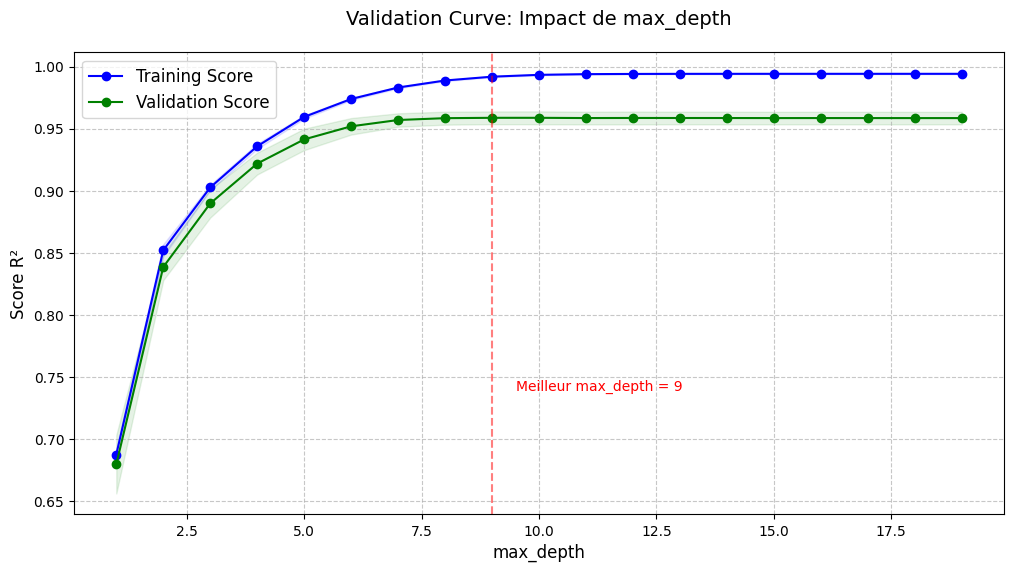

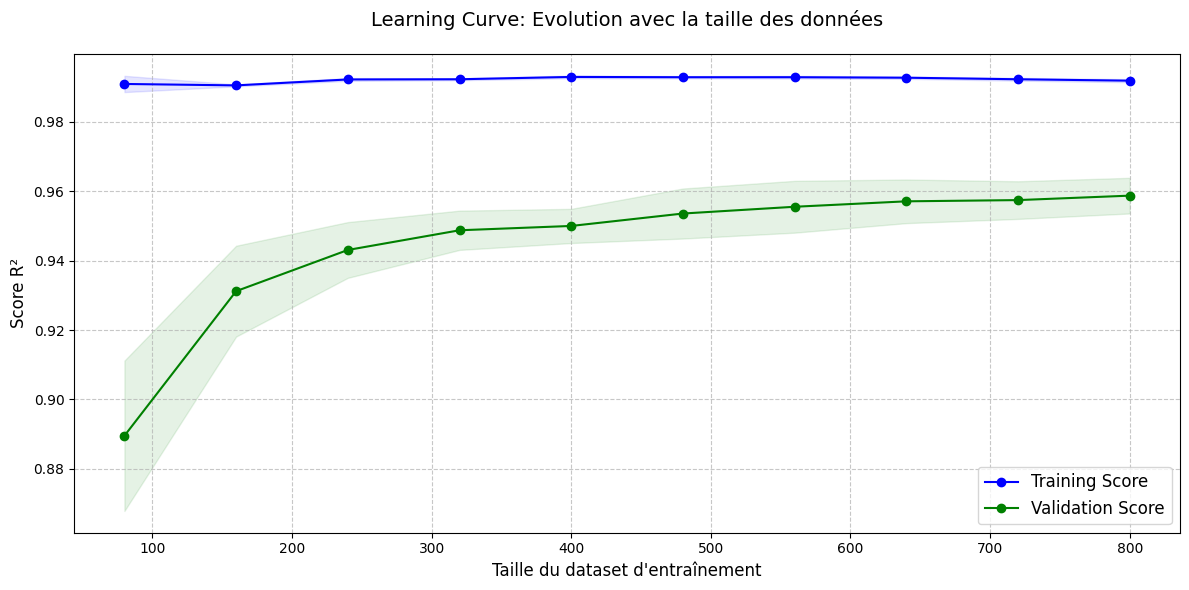

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve, learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Création d'un dataset de maisons
np.random.seed(42)
n_samples = 1000

# Données
data = {
    'surface': np.random.randint(50, 250, n_samples),
    'chambres': np.random.randint(1, 6, n_samples),
    'age': np.random.randint(0, 50, n_samples),
    'jardin': np.random.choice([0, 1], n_samples),
    'garage': np.random.choice([0, 1], n_samples)
}

# Création du DataFrame
df = pd.DataFrame(data)

# Création du prix (target)
df['prix'] = (
    df['surface'] * 2000 +
    df['chambres'] * 15000 +
    df['jardin'] * 50000 +
    df['garage'] * 25000 -
    df['age'] * 1000 +
    np.random.normal(0, 20000, n_samples)
)

# Préparation des données
X = df.drop('prix', axis=1)
y = df['prix']

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Configuration du modèle
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# 1. VALIDATION CURVE pour max_depth
max_depth_range = np.arange(1, 20)

train_scores, test_scores = validation_curve(
    rf, X_scaled, y,
    param_name="max_depth",
    param_range=max_depth_range,
    scoring="r2",
    n_jobs=-1,
    cv=5
)

# Calcul des moyennes et écarts-types
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Création du plot
plt.figure(figsize=(12, 6))
plt.title("Validation Curve: Impact de max_depth", fontsize=14, pad=20)

# Plot des scores moyens
plt.plot(max_depth_range, train_mean, label='Training Score', color='blue', marker='o')
plt.plot(max_depth_range, test_mean, label='Validation Score', color='green', marker='o')

# Ajout des zones d'écart-type
plt.fill_between(max_depth_range, train_mean - train_std, train_mean + train_std, 
                 alpha=0.1, color='blue')
plt.fill_between(max_depth_range, test_mean - test_std, test_mean + test_std, 
                 alpha=0.1, color='green')

# Personnalisation
plt.xlabel('max_depth', fontsize=12)
plt.ylabel('Score R²', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Ajout d'une ligne verticale pour le meilleur max_depth
best_depth = max_depth_range[np.argmax(test_mean)]
plt.axvline(x=best_depth, color='red', linestyle='--', alpha=0.5)
plt.text(best_depth+0.5, plt.ylim()[0] + 0.1, f'Meilleur max_depth = {best_depth}', 
         rotation=0, color='red')

# 2. LEARNING CURVE
train_sizes = np.linspace(0.1, 1.0, 10)

train_sizes, train_scores_lc, test_scores_lc = learning_curve(
    RandomForestRegressor(max_depth=best_depth, n_estimators=100, random_state=42),
    X_scaled, y,
    train_sizes=train_sizes,
    cv=5,
    n_jobs=-1,
    scoring='r2'
)

# Calcul des moyennes et écarts-types
train_mean_lc = np.mean(train_scores_lc, axis=1)
train_std_lc = np.std(train_scores_lc, axis=1)
test_mean_lc = np.mean(test_scores_lc, axis=1)
test_std_lc = np.std(test_scores_lc, axis=1)

# Création du second plot
plt.figure(figsize=(12, 6))
plt.title("Learning Curve: Evolution avec la taille des données", fontsize=14, pad=20)

# Plot des scores moyens
plt.plot(train_sizes, train_mean_lc, label='Training Score', color='blue', marker='o')
plt.plot(train_sizes, test_mean_lc, label='Validation Score', color='green', marker='o')

# Ajout des zones d'écart-type
plt.fill_between(train_sizes, train_mean_lc - train_std_lc, train_mean_lc + train_std_lc, 
                 alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean_lc - test_std_lc, test_mean_lc + test_std_lc, 
                 alpha=0.1, color='green')

# Personnalisation
plt.xlabel('Taille du dataset d\'entraînement', fontsize=12)
plt.ylabel('Score R²', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()